In [3]:
# Import de Bibliotecas
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
#from detecta import detect_peaks

In [4]:
# NB Configuration

%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')
plt.style.use(r'../../src/visualization/my_style.mplstyle')

In [39]:
path = r'../../data/raw/caso_full.csv.gz'
df = pd.read_csv(path)

In [40]:
df.columns

Index(['city', 'city_ibge_code', 'date', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_confirmed', 'new_deaths'],
      dtype='object')

In [41]:
date_type_category = ['city', 'city_ibge_code', 'place_type','state']
df[date_type_category] = df[date_type_category].astype('category')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['last_available_date'] = pd.to_datetime(df['last_available_date'], format='%Y-%m-%d')
df = df.sort_values(by='date', ascending=True)

In [43]:
df_am = df.query('state == "SP" and city == "Americana"')

In [45]:
# DataFrame de Americana-SP agrupoado por Semana Epidemiológica
df_am_ew = df_am.groupby('epidemiological_week').sum()
df_am_ew = df_am_ew.iloc[:-1]

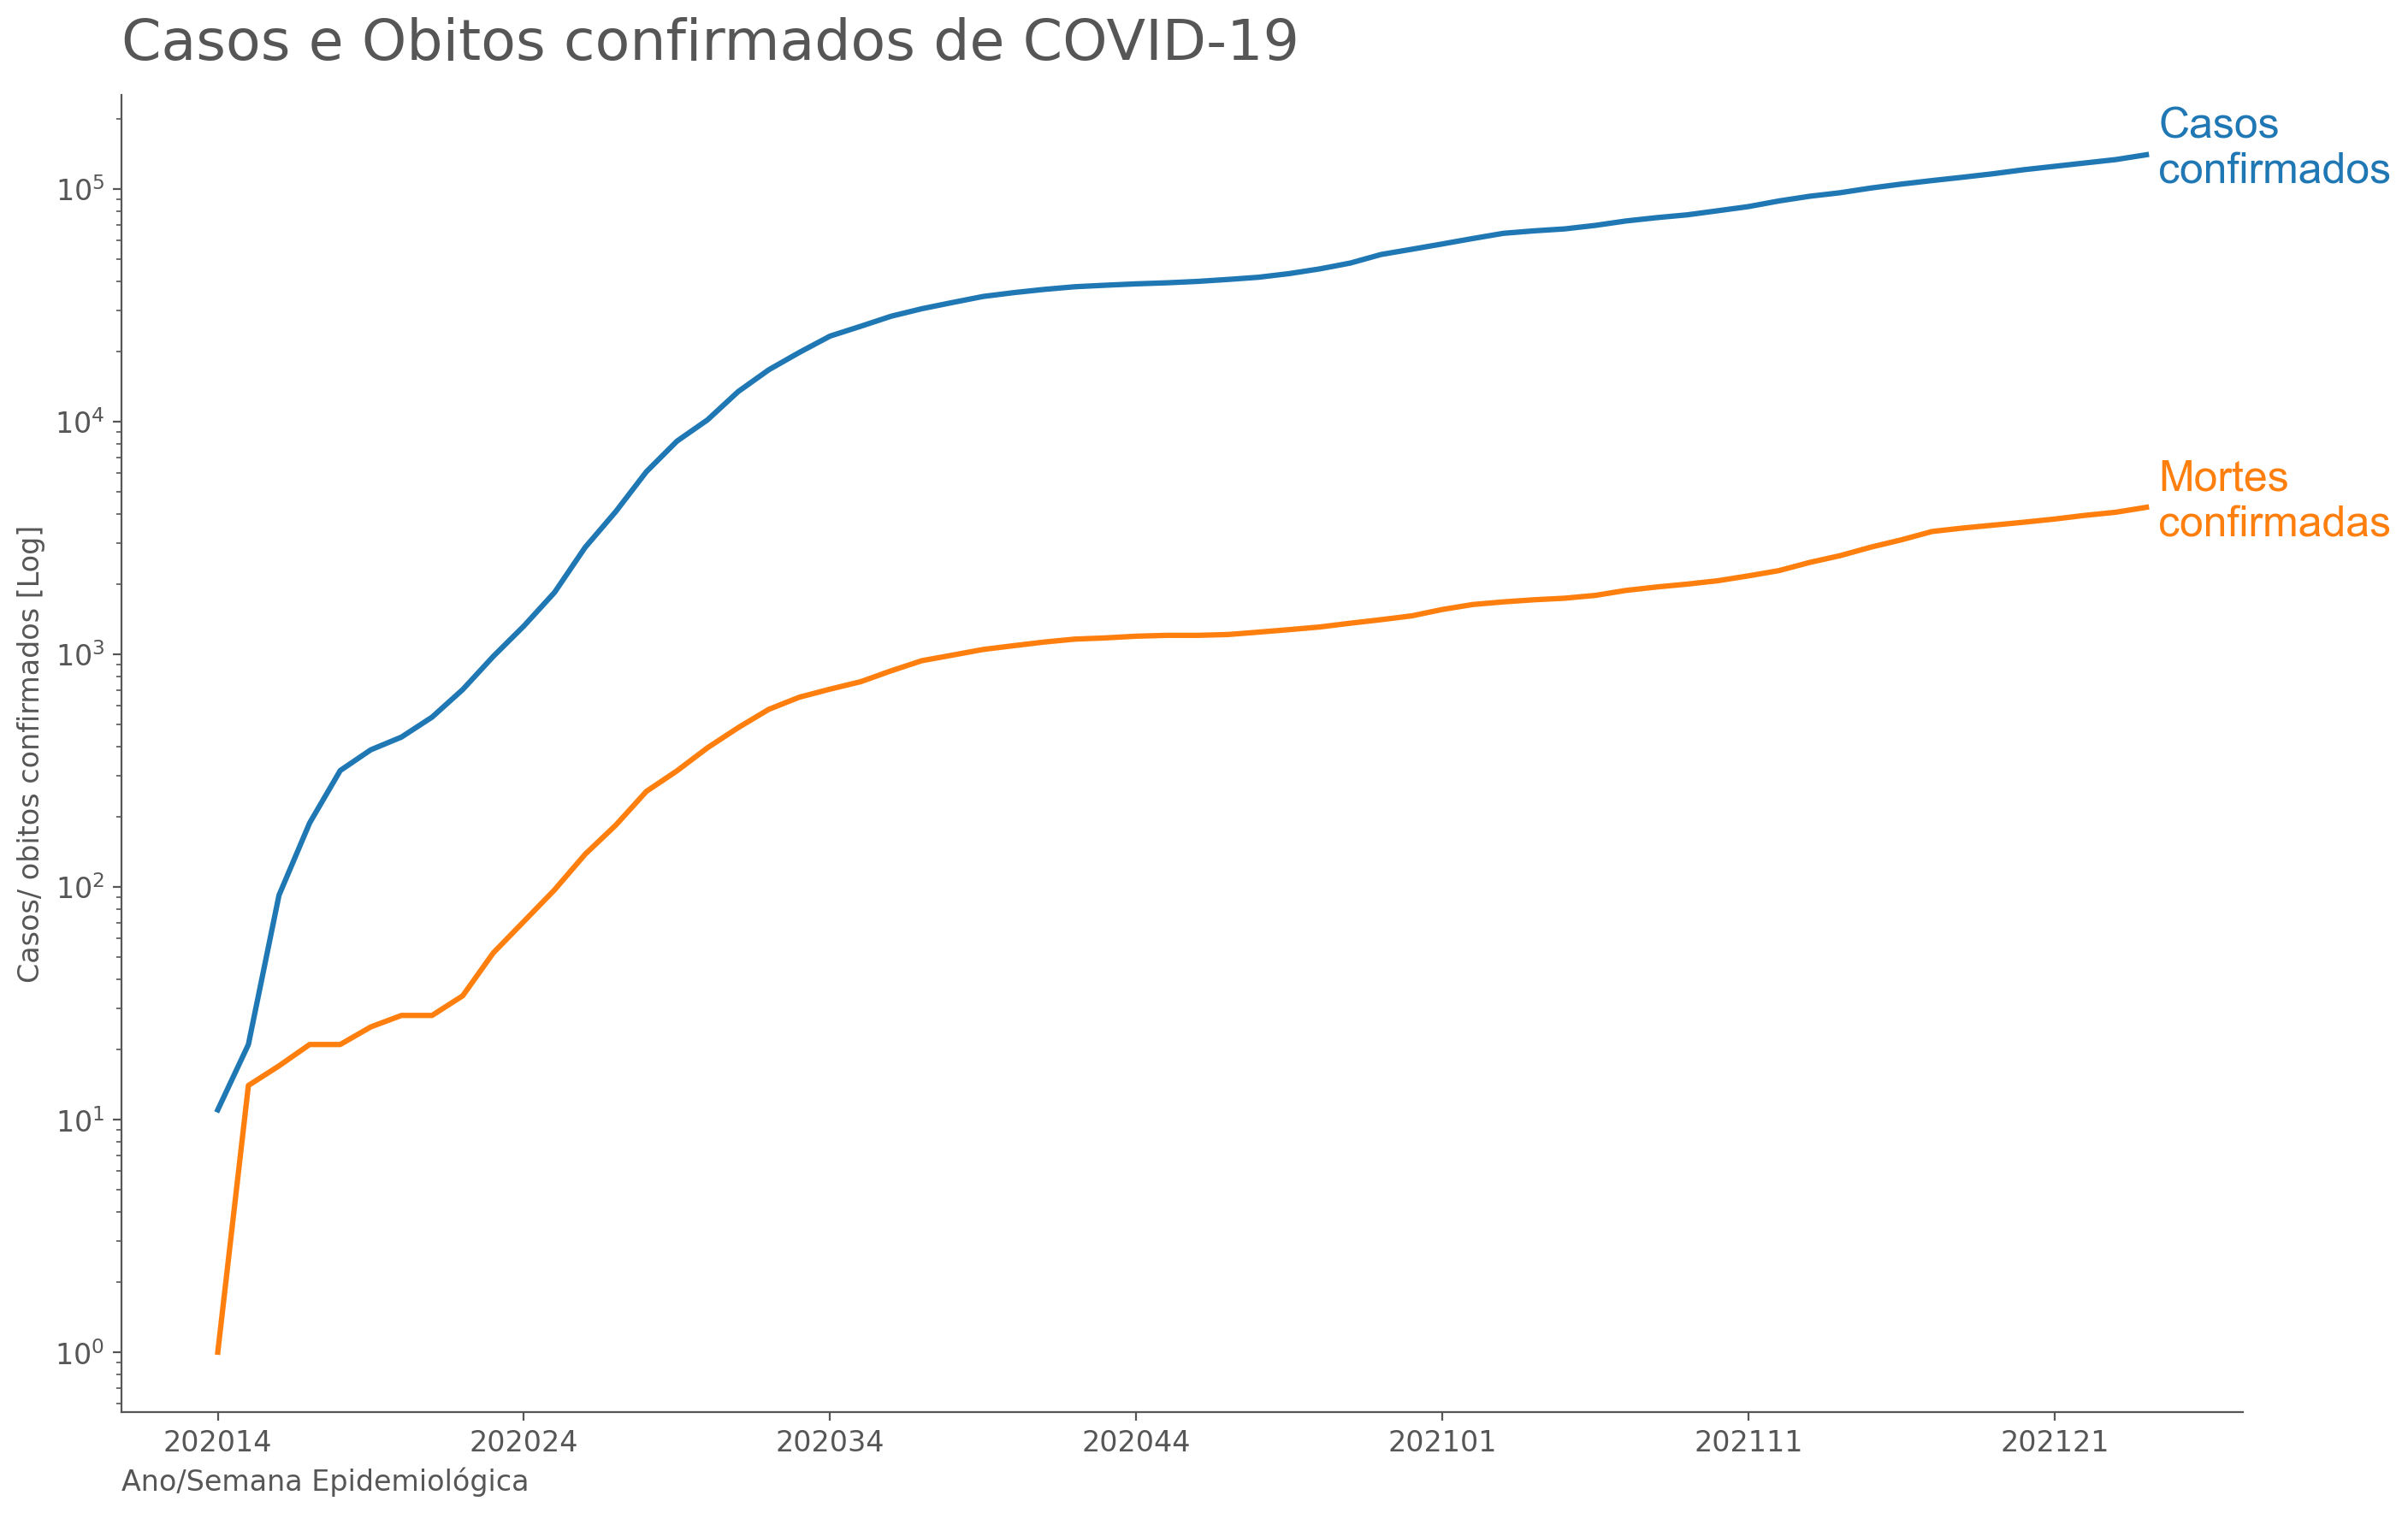

In [100]:
ax1=sns.lineplot(x=range(len(df_am_ew)),y='last_available_confirmed', data=df_am_ew)
ax1.annotate(text='Casos\nconfirmados',
             xy=(range(len(df_am_ew))[-1], df_am_ew['last_available_confirmed'].iloc[-1]),
             xycoords='data',
             xytext=(5, -12),  # New param
             textcoords='offset points',
             color='#1f77b4',
             fontname = "Arial")  # New para
sns.lineplot(x=range(len(df_am_ew)),y='last_available_deaths', data=df_am_ew)
plt.annotate(text='Mortes\nconfirmadas',
             xy=(range(len(df_am_ew))[-1], df_am_ew['last_available_deaths'].iloc[-1]),
             xycoords='data',
             xytext=(5, -12),  # New param
             textcoords='offset points',
             color='#ff7f0e',
             fontname = "Arial")  # New para
mpl.pyplot.yscale('log')
plt.title('Casos e Obitos confirmados de COVID-19')
plt.xlabel('Ano/Semana Epidemiológica')
plt.ylabel('Casos/ obitos confirmados [Log]')
plt.xticks(ticks=np.arange(0, 64, step=10), labels=df_am_ew.index[np.arange(0, 64, step=10)])
plt.savefig('../../reports/figures/casos_e_obitos_confirmados.png')

In [101]:
df_am_ew['cfr'] = (df_am_ew['last_available_deaths']/df_am_ew['last_available_confirmed'])*100

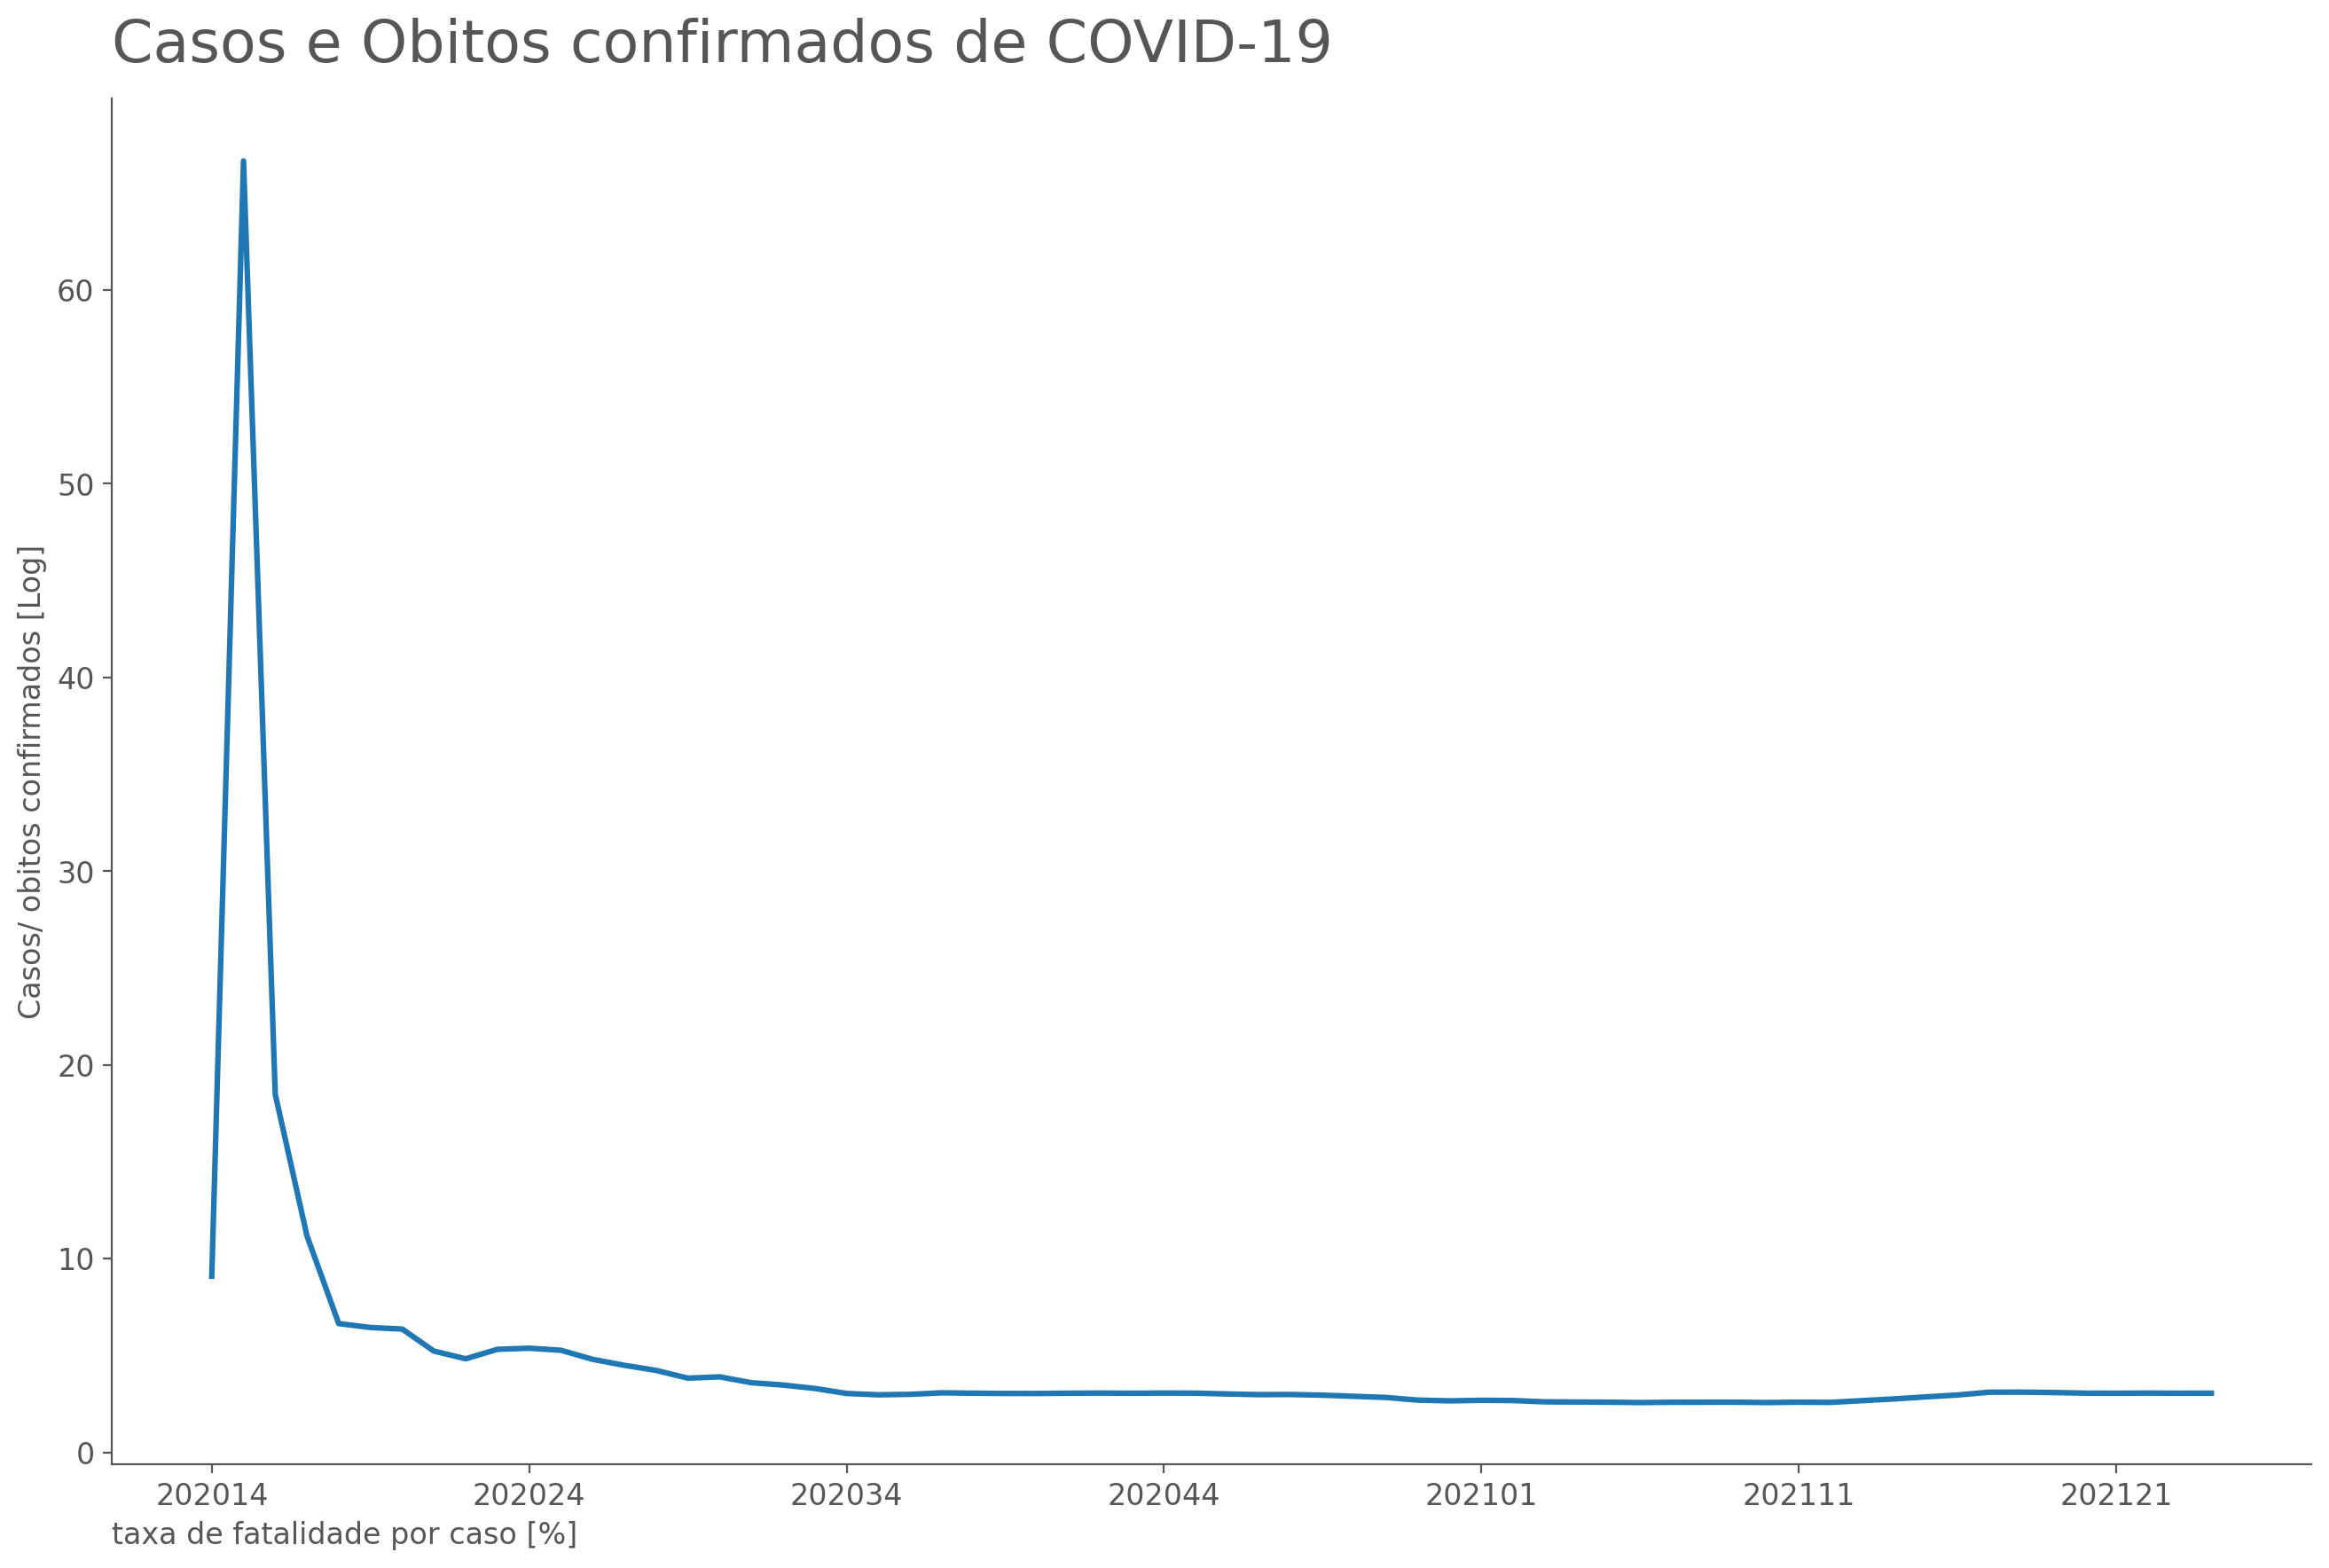

In [125]:
sns.lineplot(x=range(len(df_am_ew)), y='cfr', data=df_am_ew)
sns.lineplot(x=pd.Series(range(len(df_am_ew))).iloc[np.arange(0, 64, step=10)],
             y='cfr', data=df_am_ew.iloc[np.arange(0, 64, step=10)],
            marker='o')
plt.title('Casos e Obitos confirmados de COVID-19')
plt.xlabel('taxa de fatalidade por caso [%]')
plt.ylabel('Casos/ obitos confirmados [Log]')
plt.xticks(ticks=np.arange(0, 64, step=10), labels=df_am_ew.index[np.arange(0, 64, step=10)])
plt.show()

In [111]:
len(df_am_ew.iloc[np.arange(0, 64, step=10)])

7

In [116]:
range(len(df_am_ew))[np.arange(0, 64, step=10)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [121]:
pd.Series(range(len(df_am_ew))).iloc[np.arange(0, 64, step=10)]

0      0
10    10
20    20
30    30
40    40
50    50
60    60
dtype: int64

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.DataFrame({'eixo_x':np.linspace(1, 10, 10)})
df['eixo_y'] = df['eixo_x']*3 + 1

In [13]:
df

,eixo_x,eixo_y
0,1.0,4.0
1,2.0,7.0
2,3.0,10.0
3,4.0,13.0
4,5.0,16.0
5,6.0,19.0
6,7.0,22.0
7,8.0,25.0
8,9.0,28.0
9,10.0,31.0


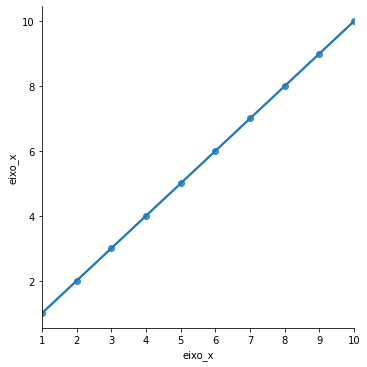

In [14]:
sns.lmplot(x='eixo_x',y='eixo_x',data=df)

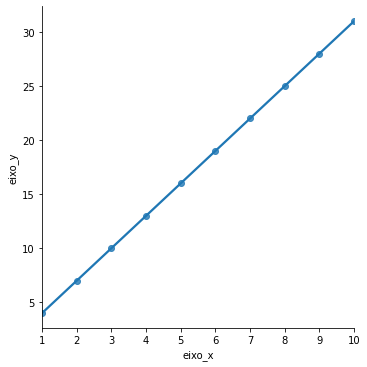

In [15]:
sns.lmplot(x='eixo_x',y='eixo_y',data=df)